# Euler Method and Trapezoid Rule for Solving 1D ODE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def Euler_Forward(f, x0, dt, T):
    x_pred = [0 for i in range(len(T))]
    x_pred[0] = x0
    for i in range(1,len(T)):
        x_previous = x_pred[i-1]
        x_pred[i] = x_previous + dt*f(x_previous, T[i-1])
    return x_pred

In [3]:
def Trapezoid_Rule(f, x0, dt, T):
    x_pred = [0 for i in range(len(T))]
    x_pred[0] = x0
    gamma = 1 + dt/2
    for i in range(1,len(T)):
        x_previous = x_pred[i-1]
        x_pred[i] = (x_previous + dt/2*f(x_previous, T[i-1]) + dt/2*T[i])/gamma
    return x_pred

In [4]:
# Initialization
dt = 0.01
N = int(1/dt)
T = [i*dt for i in range(N+1)]

f_exact = lambda t: t - 1 + 3/math.exp(t)
x_exact = [f_exact(t) for t in T]

f = lambda x,t: t-x
x0 = 2

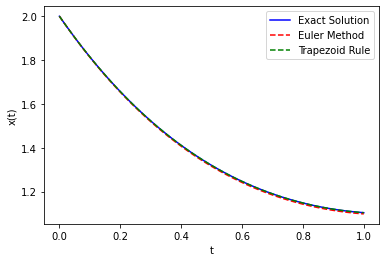

In [5]:
# Plot All
E_estimate = Euler_Forward(f, x0, dt, T)
T_estimate = Trapezoid_Rule(f, x0, dt, T)

plt.figure()
plt.plot(T, x_exact,'b',label='Exact Solution')
plt.plot(T, E_estimate,'r--', label='Euler Method')
plt.plot(T, T_estimate,'g--', label='Trapezoid Rule')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

## Manipulating with Errors 

Let's first have a look at the errors with our initial choice $\Delta t = 0.01$

In [6]:
error_Euler = [abs(x_exact[i]-E_estimate[i]) for i in range(len(T))]
error_Trapezoid = [abs(x_exact[i]-T_estimate[i]) for i in range(len(T))]

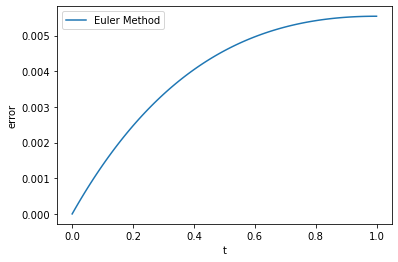

In [9]:
plt.figure()
plt.plot(T, error_Euler, label='Euler Method')
plt.xlabel('t')
plt.ylabel('error')
plt.legend()
plt.show()

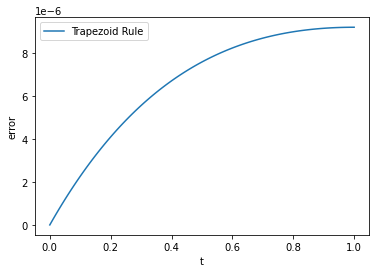

In [10]:
plt.figure()
plt.plot(T, error_Trapezoid, label='Trapezoid Rule')
plt.xlabel('t')
plt.ylabel('error')
plt.legend()
plt.show()

As we can see from the figure above, Trapezoid Rule already obtains an error less than $10^{-4}$ with our initial choice $\Delta t = 0.01$\
We now test for Euler Method with different choices of $\Delta t$

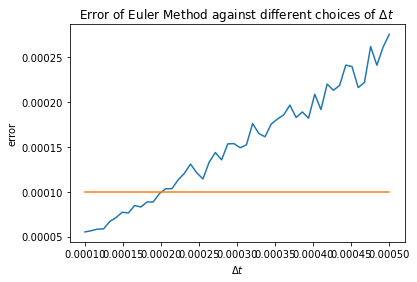

In [20]:
dt_list = np.linspace(0.0001, 0.0005)
x1_list = [0 for i in range(len(dt_list))]
error_list = [0 for i in range(len(dt_list))]
x1_exact = x_exact[-1]

for i in range(len(dt_list)):
    dt_i = dt_list[i]
    N_i = int(1/dt_i)
    T_i = [i*dt_i for i in range(N_i+1)]
    x1_list[i] = Euler_Forward(f, x0, dt_i, T_i)[-1]
    error_list[i] = abs(x1_list[i] - x1_exact)

plt.figure()
plt.title(r'Error of Euler Method against different choices of $\Delta t$')
plt.plot(dt_list, error_list)
plt.plot(dt_list, [1e-4 for i in range(len(dt_list))])
plt.xlabel(r'$\Delta t$')
plt.ylabel('error')
plt.show()

As we can see from the figure above, let's choose $\Delta t$ to be values that is less than approximately 0.0002, say, choose $\Delta t = 0.00015$, we can have error to be less than $10^{-4}$ for Euler method